In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import numpy as np
import time
import datetime
from graph_utils import *

In [2]:
df_prox_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="proximity_rituals")
df_rqi_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="rqi_rituals")
df_coalitions_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="coalitions_rituals")
df_ritual_details = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="ritual_details")
df_ritual_details = df_ritual_details[df_ritual_details['dyad'].notna()]
df_census_fl = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="censusFL")

/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed

Size : (659, 10)
Average path length: 3.6151711378353375
Clustering coefficient: 0.8311875675268309
nodes: 47


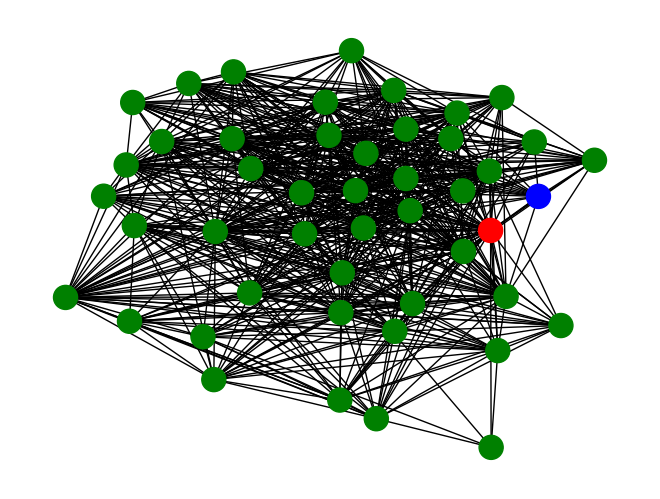

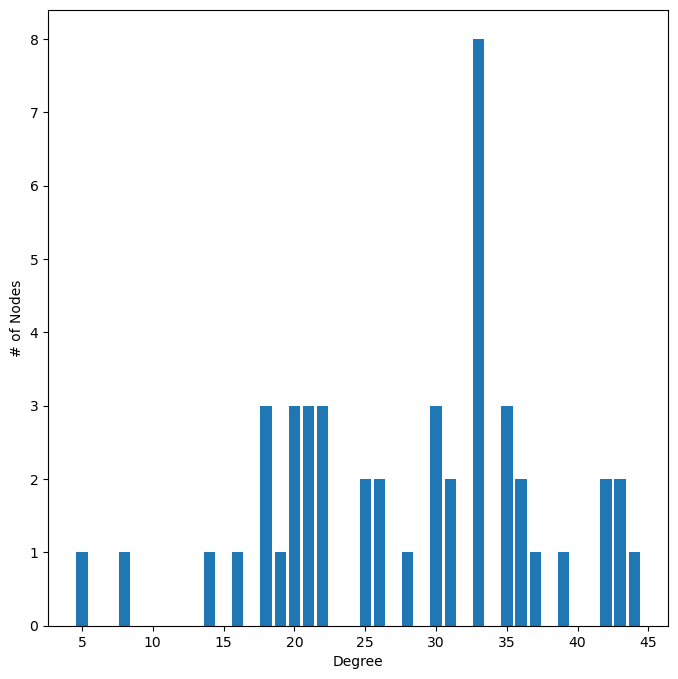

In [3]:
plt.rcdefaults()

prox_df = df_prox_rituals[df_prox_rituals["SRI"] != 0]
prox_df.ritualcount.value_counts() == df_prox_rituals.ritualcount.value_counts()


prox_g = nx.Graph()
node_colors = []
for i in prox_df.index:
    m1 = prox_df.loc[i, 'm1']
    m2 = prox_df.loc[i, 'm2']
    prox_g.add_edge(m1, m2, weight=prox_df.loc[i, 'SRI'])
keystone = max(nx.betweenness_centrality(prox_g).items(), key=lambda x: x[1])
color_map = ['red' if node == keystone[0] else 'blue' if node == 'HGL' else 'green' for node in prox_g]    

print(f"Size : {prox_df.shape}")


nx.draw(prox_g, node_color = color_map)
print(f"Average path length: {avg_path_length(prox_g)}")
print(f"Clustering coefficient: {nx.average_clustering(prox_g)}")

print (f"nodes: {nx.number_of_nodes(prox_g)}")
degree_distribution(prox_g)

In [1]:
#Changed to show weights per nodes instead of degree, just testing can change back
g0 = nx.read_weighted_edgelist("g_0")
g1 = nx.read_weighted_edgelist("g_1")
g2 = nx.read_weighted_edgelist("g_2")
g3 = nx.read_weighted_edgelist("g_3")
g4 = nx.read_weighted_edgelist("g_4")


edges, deg_view = zip(*nx.get_edge_attributes(g4, 'weight').items())
degs = []
for item in deg_view:
    degs.append(item)
nodes = g4.nodes()

zipped = zip(nodes,degs)
zipped = sorted(zipped, key=lambda y: y[1])
x, y = [], []
for i, j in zipped:
    x.append(i)
    y.append(j)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [12, 3.50]
plt.title("Degrees per Node")
plt.plot(x,y)

NameError: name 'nx' is not defined

44 5
1.0 0.000552181
(0.019607843, 0.018867925, 0.027027027, 0.066666667, 0.02247191, 0.012388503, 0.005434783, 0.020214782, 0.21501428, 0.378516624, 0.010288654, 0.007179782, 0.007398639, 0.002, 0.002079002, 0.008831522, 0.010869565, 0.009270705, 0.000555556, 0.004744958, 0.005737966, 0.011850501, 0.011348465, 0.006097561, 0.01022106, 0.009467456, 0.001902346, 0.050231328, 0.015498799, 0.450307828, 0.182094595, 0.022133939, 0.019940179, 0.036119945, 0.054388422, 0.00796236, 0.018614271, 0.002606429, 0.023054755, 0.006407323, 0.005915101, 0.008362369, 0.008791588, 0.005603811, 0.001792115, 0.004062681, 0.004567402, 0.073654391, 0.004758949, 0.003496503, 0.00244798, 0.07336594, 0.017964728, 0.009786477, 1.0, 0.004310345, 0.001083815, 0.00436205, 0.00935412, 0.06372549, 0.010698655, 0.00973913, 0.094405017, 0.136069114, 0.082818294, 0.044769454, 0.016957996, 0.016078359, 0.001284027, 0.026967337, 0.003125, 0.017344173, 0.009703779, 0.074626866, 0.007040601, 0.033757339, 0.026666667, 0.03

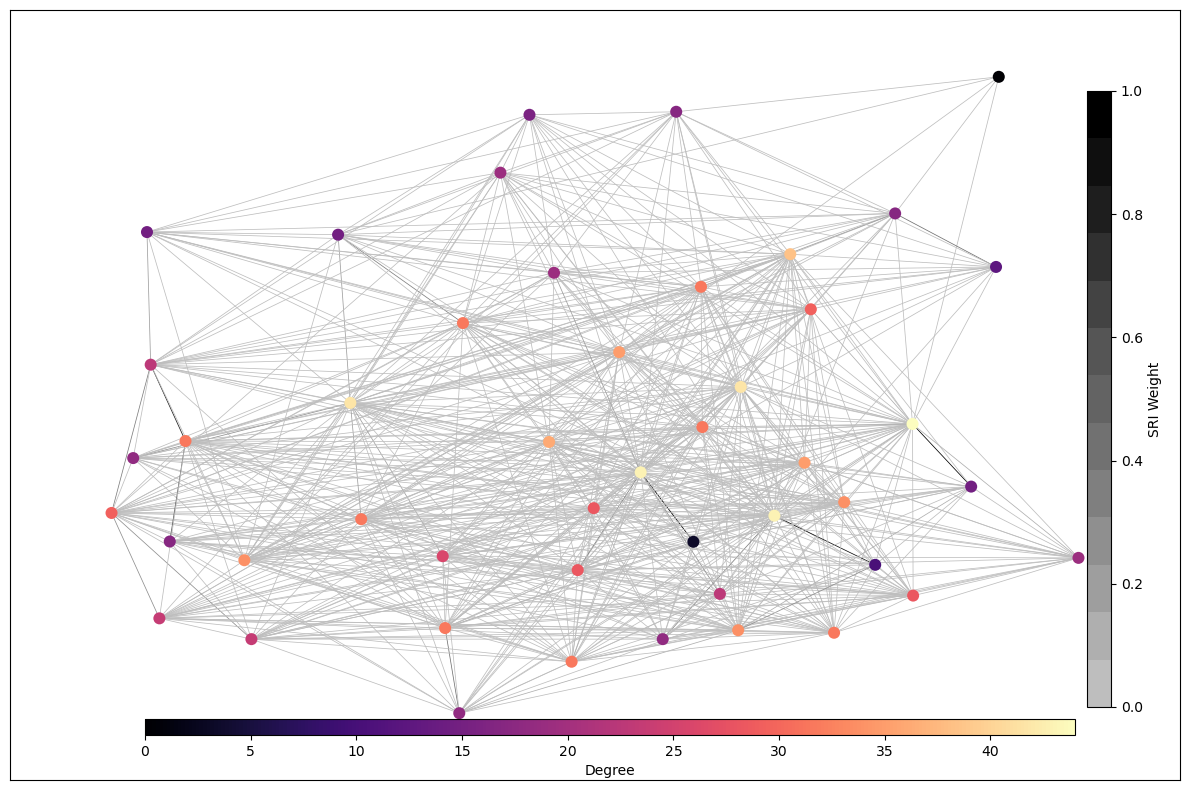

In [10]:
#Make the prox graph reptty
# g0 = nx.read_weighted_edgelist("g_0")
# g1 = nx.read_weighted_edgelist("g_1")
# g2 = nx.read_weighted_edgelist("g_2")
# g3 = nx.read_weighted_edgelist("g_3")
# g4 = nx.read_weighted_edgelist("g_4")

opt_g = prox_g


deg_view = opt_g.degree()
degs = []
for item in deg_view:
    degs.append(item[1])
nodes = opt_g.nodes()

zipped = zip(nodes,degs)
zipped = sorted(zipped, key=lambda y: y[1])

widths = nx.get_edge_attributes(opt_g, 'weight')
nodelist = opt_g.nodes()


edges, weights = zip(*nx.get_edge_attributes(opt_g,'weight').items())
cmap = plt.cm.Greys(np.linspace(0,1,20)) # Getting color map as a matrix of colors to reinterpolate
cmap = cl.ListedColormap(cmap[7:])

zip_dict = dict(zipped)
max_deg = max(zip_dict.values())
min_deg = min(zip_dict.values())
print(max_deg, min_deg)

max_wt = max(weights)
min_wt = min(weights)
print(max_wt, min_wt)

val_map = {node : deg / max_deg for node, deg in zip_dict.items()}

values = [val_map.get(node) for node in opt_g.nodes()]

print(weights, "\n")

print(values)
fig=plt.figure(figsize=(12, 8))
ax = plt.axes()

node_options = {"node_color": values, "node_size": 75, "linewidths": 0, "cmap": plt.cm.magma}
edge_options = {"width": 0.55, "edge_color": weights, "edge_cmap": cmap}
pos = nx.spring_layout(opt_g, seed=13)  # Seed for reproducible layout
nodes = nx.draw_networkx_nodes(opt_g, pos, **node_options, ax=ax)
edges = nx.draw_networkx_edges(opt_g, pos, **edge_options, ax=ax)

# Create an axes for colorbar. The position of the axes is calculated based on the position of ax.
# You can change 0.01 to adjust the distance between the main image and the colorbar.
# You can change 0.02 to adjust the width of the colorbar.
# This practice is universal for both subplots and GeoAxes.

edge_cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
node_cax = fig.add_axes([ax.get_position().y0+0.015, ax.get_position().x0-0.05, ax.get_position().width, 0.02])

edge_norm = cl.Normalize(vmin=0, vmax=max_wt)
node_norm = cl.Normalize(vmin=0,vmax=max_deg)


edge_clbr = mpl.colorbar.ColorbarBase(edge_cax, label="SRI Weight", norm=edge_norm, cmap=cmap)
node_clbr = mpl.colorbar.ColorbarBase(node_cax, orientation="horizontal", norm=node_norm, cmap=plt.cm.magma, label="Degree")

plt.show()


In [ ]:
def find_keystones(graph, num_keystones, verbose=False):
    prox_keystones = []
    prox_cent = nx.betweenness_centrality(graph)
    for i in range(num_keystones):
        keystone = max(prox_cent.items(), key=lambda x: x[1])
        prox_cent.pop(keystone[0])
        prox_keystones.append(keystone)
    if verbose:
        print("Proximity Keystones & Their centrailty score")
        for i in prox_keystones: 
            print(f"{i}")
    return prox_keystones

cent = [c[1] for c in find_keystones(prox_g, 47, verbose = True)]

plt.plot(np.arange(47), sorted(cent), label = "Betweenness Centrality", linewidth=1)
plt.xlabel('Agents')
plt.ylabel('Betweenness Centrality')
plt.ylim([0, 0.08])
plt.legend()
plt.savefig(f"./base_graph.png", dpi=500)
plt.show()

nx.write_adjlist(prox_g, "./prox_g.adj")


In [ ]:
rand_g = nx.random_reference(prox_g)
latt_g = nx.lattice_reference(prox_g)

In [ ]:
C = nx.average_clustering(prox_g)
L = nx.average_shortest_path_length(prox_g)

In [ ]:
Cr = nx.average_clustering(rand_g)
Lr = nx.average_shortest_path_length(rand_g)

In [ ]:
Cl = nx.average_clustering(latt_g)

In [ ]:
sigma = (C / Cr) / (L / Lr)
# print(sigma)

omega = (Lr / L) - (C / Cl)
print(omega)

In [ ]:
# print(nx.sigma(prox_g, niter=1, nrand=1))
print(nx.omega(prox_g, niter=1, nrand=1))

In [ ]:
print(nx.sigma(prox_g))

In [ ]:
print(df_prox_rituals)